In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## Data

In [3]:
start = 0
stop = 1
step = 0.02
X = torch.arange(start, stop, step).unsqueeze(dim=1)

X_new = torch.cat((X,X**2), dim=1)

In [4]:
weight_01 = 1
weight_02 = 10.3
bias = 2

y = weight_01*X_new[:,0] + weight_02*X_new[:,1] + bias
y = y.unsqueeze(dim=1)
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[2.0000],
         [2.0241],
         [2.0565],
         [2.0971],
         [2.1459],
         [2.2030],
         [2.2683],
         [2.3419],
         [2.4237],
         [2.5137]]))

In [5]:
# split data
train_split = int(0.8*len(X))
X_train, y_train = X_new[:train_split], y[:train_split]
X_test, y_test = X_new[train_split:], y[train_split:]

In [6]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [7]:
# plotting the data
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

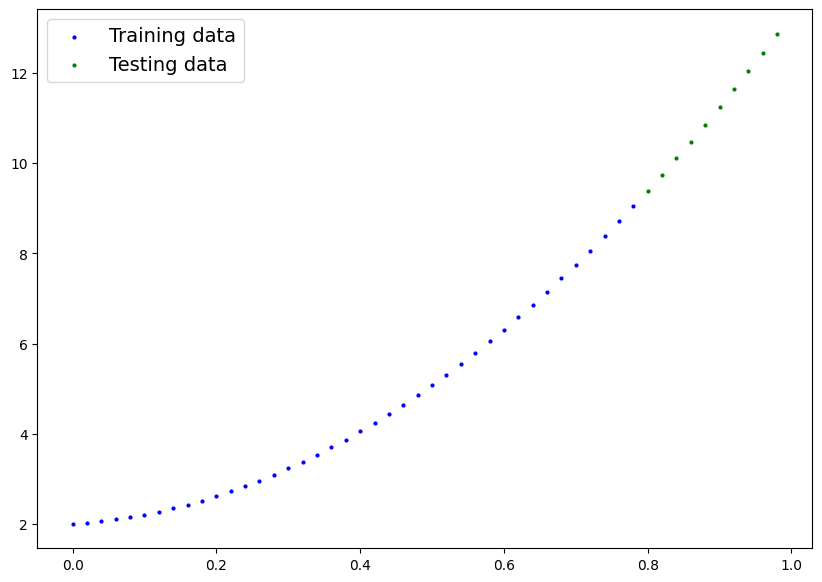

In [8]:
plot_predictions(X[:40],y_train,X[40:],y_test)

## Building a model

In [9]:
class nonLinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=2,
                            out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# set manual seed
torch.manual_seed(42)

model_1 = nonLinearRegression()
model_1, model_1.state_dict()

(nonLinearRegression(
   (linear_layer): Linear(in_features=2, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.5406, 0.5869]])),
              ('linear_layer.bias', tensor([-0.1657]))]))

In [10]:
# check model current device
next((model_1.parameters())).device

device(type='cpu')

In [11]:
# set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

## Training

For training


*   Loss function
*   Optimizer
* Training loop
* Testing loop



In [12]:
# loss function
loss_fn = nn.L1Loss()

# optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.1)

In [13]:
# training loop
torch.manual_seed(42)

# put data on the target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

epochs = 3000
for epoch in range(epochs):
  # set the model to training mode.
  model_1.train()

  # forward pass
  y_pred = model_1(X_train)

  # calculate the loss
  loss = loss_fn(y_pred, y_train)

  # optimizer zero grad
  optimizer.zero_grad()

  # perform backpropagation
  loss.backward()

  # optimizer step
  optimizer.step()

  # testing loop
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 4.3398871421813965 | Test Loss: 10.149261474609375
Epoch: 100 | Loss: 0.8354897499084473 | Test Loss: 3.958861827850342
Epoch: 200 | Loss: 0.36011070013046265 | Test Loss: 2.263002872467041
Epoch: 300 | Loss: 0.23845067620277405 | Test Loss: 1.4238828420639038
Epoch: 400 | Loss: 0.21506264805793762 | Test Loss: 1.1142406463623047
Epoch: 500 | Loss: 0.2039543092250824 | Test Loss: 1.0218545198440552
Epoch: 600 | Loss: 0.19426193833351135 | Test Loss: 0.9725450277328491
Epoch: 700 | Loss: 0.18458643555641174 | Test Loss: 0.9141350984573364
Epoch: 800 | Loss: 0.1748940497636795 | Test Loss: 0.8648258447647095
Epoch: 900 | Loss: 0.1652185469865799 | Test Loss: 0.8064152598381042
Epoch: 1000 | Loss: 0.15552619099617004 | Test Loss: 0.7571070790290833
Epoch: 1100 | Loss: 0.1458776891231537 | Test Loss: 0.701005756855011
Epoch: 1200 | Loss: 0.13621696829795837 | Test Loss: 0.6510939598083496
Epoch: 1300 | Loss: 0.12655414640903473 | Test Loss: 0.6011823415756226
Epoch: 1400 |

In [14]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[1.5702, 9.6008]])),
             ('linear_layer.bias', tensor([2.0018]))])

## Making and evaluating predictions

In [15]:
# turn model into evaluation mode
model_1.eval()

# make predictions
with torch.inference_mode():
  test_pred_new = model_1(X_test)

test_pred_new

tensor([[ 9.4025],
        [ 9.7450],
        [10.0951],
        [10.4530],
        [10.8185],
        [11.1917],
        [11.5725],
        [11.9611],
        [12.3573],
        [12.7612]])

In [16]:
#np.array(test_pred_new.detach().numpy())

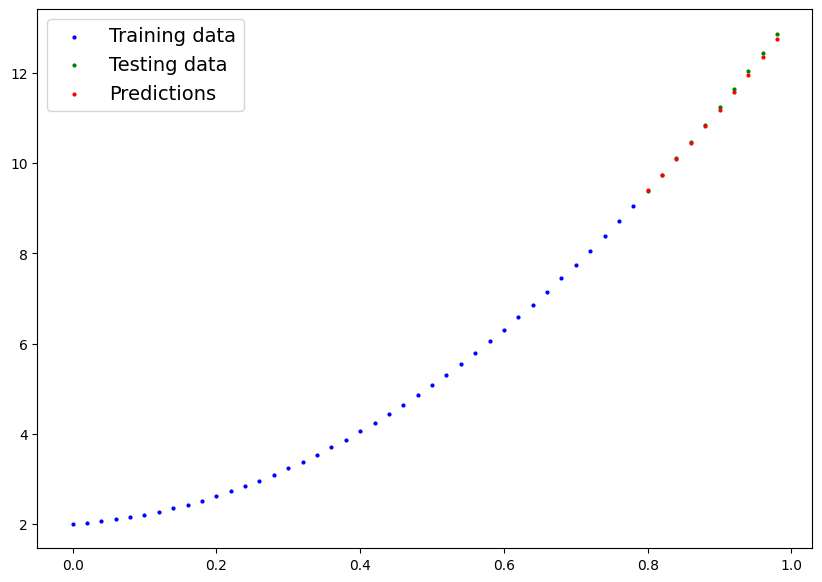

In [17]:
plot_predictions(X[:40], y_train, X[40:], y_test, test_pred_new)

## Saving and loading a trained model

In [18]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "non_linear_regression_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/non_linear_regression_model_1.pth')

In [19]:
# save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
         f=MODEL_SAVE_PATH)


Saving model to: models/non_linear_regression_model_1.pth


In [20]:
# load a model
loaded_model = nonLinearRegression()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-20-068885f00b91>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [21]:
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[1.5702, 9.6008]])),
             ('linear_layer.bias', tensor([2.0018]))])

In [22]:
loaded_model.to(device)

nonLinearRegression(
  (linear_layer): Linear(in_features=2, out_features=1, bias=True)
)